In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ideas: heatmap de top ataques entre paises (cantidad como profundidad)
#         cantidad de vpn/proxy usados por pais pero en forma de mundi

In [2]:
train_data = pd.read_parquet('/content/drive/MyDrive/OrgaDeDatos/train.parq')

# Mapa 2d con distribuciones marginales

In [4]:
train_data[['protocol', 'attack_type']] = train_data['attack_type'].str.split(':', n=1, expand=True)
pivot_table = pd.pivot_table(train_data, values='label', index='protocol', columns='attack_type', aggfunc='count', fill_value=0)
pivot_table = pivot_table / 1000

In [7]:
plot2d_data = train_data.loc[:, ["attack_type", "label"]]
del train_data
plot2d_data["attack_protocol"] = plot2d_data.attack_type.map(lambda row: row.split(':')[0])

b = plot2d_data.groupby("attack_protocol").agg({"label": "sum"}).reset_index()
a = plot2d_data.groupby(["attack_type"]).agg({"label": "sum"}).reset_index()

a["attack_protocol_label_count"] = a.attack_type.map(lambda attack: b.loc[b["attack_protocol"] == attack.split(":")[0], "label"]).iloc[0]
a["protocol"] = a.attack_type.map(lambda row: row.split(':')[0])

Pequenio comentario: intente muchisimo centrar los marginales con los cuadrados del heatmap pero no hubo forma :/

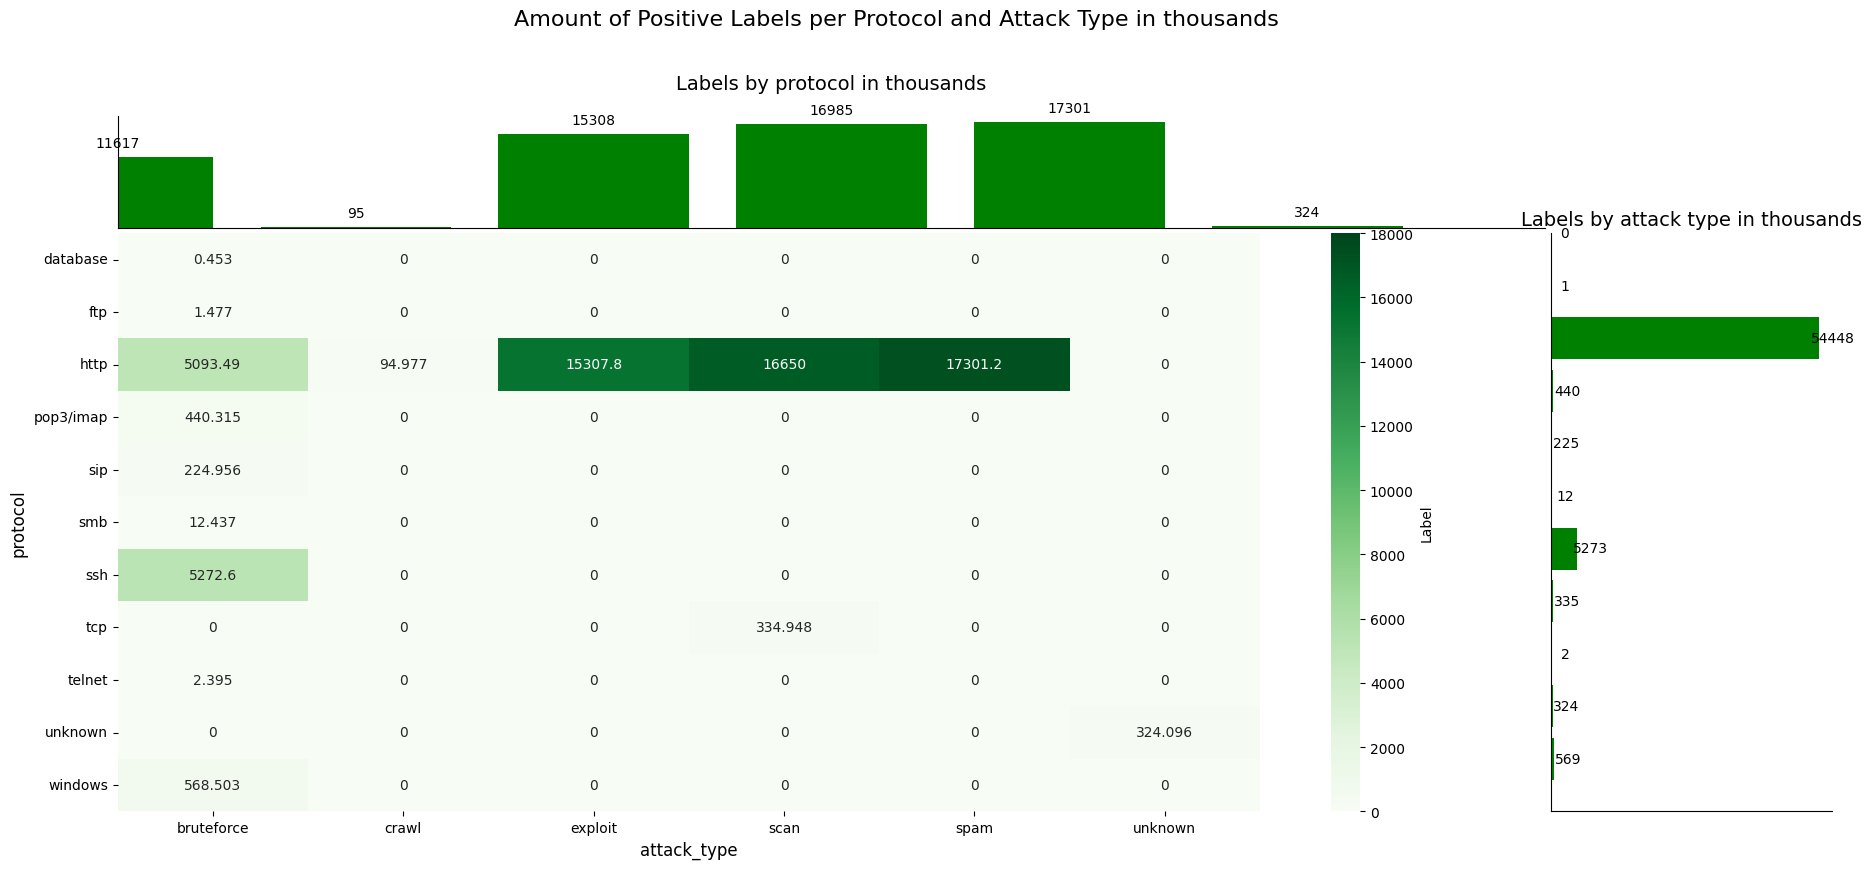

In [49]:
g = sns.jointplot(data=a, x='label', y='protocol', cbar_kws={'label': 'Amount of positive labels'}, kind='hist', marginal_ticks='all')

g.ax_marg_y.cla()
g.ax_marg_x.cla()

g.set_axis_labels('Label', 'Attack Protocol Label Count', fontsize=12)

# heatmap_data = a.pivot(index='attack_type', columns='protocol', values='label').fillna(0)
# plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pivot_table, cmap='Greens', vmin=0, vmax=18000, annot=True, fmt='g', cbar_kws={'label': 'Label'})

row_sums = pivot_table.sum(axis=1)
col_sums = pivot_table.sum(axis=0)
g.ax_marg_y.barh(range(len(row_sums)), row_sums, color='green')
g.ax_marg_x.bar(range(len(col_sums)), col_sums, color='green')

# Le saca los ticks a los histogramas
g.ax_marg_x.tick_params(axis='x', bottom=False, labelbottom=False)
g.ax_marg_y.tick_params(axis='y', left=False, labelleft=False)
g.ax_marg_x.tick_params(axis='y', left=False, labelleft=False)
g.ax_marg_y.tick_params(axis='x', bottom=False, labelbottom=False)

g.ax_marg_x.set_title("Labels by protocol in thousands", fontsize=14, pad=20)
g.ax_marg_y.set_title("Labels by attack type in thousands", fontsize=14)

g.fig.set_size_inches(20, 8)
# g.fig.subplots_adjust(hspace=0.3)
g.fig.subplots_adjust(hspace=0.05, wspace=0.02)

ax_marg_x = g.ax_marg_x
ax_marg_y = g.ax_marg_y

# para aniadir el valor de cada barra en los plots marginales
for p in ax_marg_x.patches:
    ax_marg_x.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for p in ax_marg_y.patches:
    ax_marg_y.annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='center', va='center', xytext=(10, 0), textcoords='offset points')



g.fig.suptitle("Amount of Positive Labels per Protocol and Attack Type in thousands", y=1.1, fontsize=16)

plt.show()

# Bar Plot

Text(0, 0.5, 'Amount of VPN/Proxy uses')

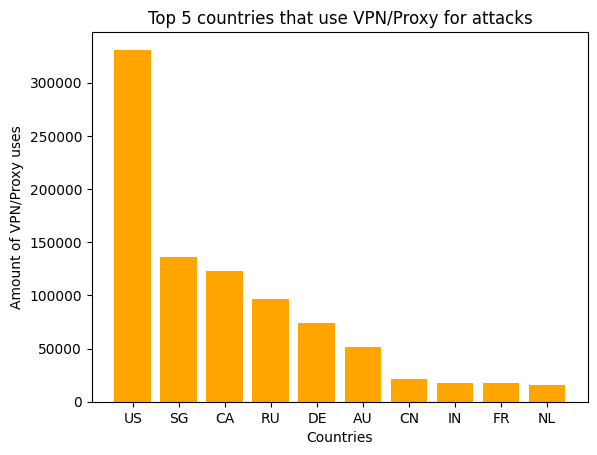

In [ ]:
top_5_countries_vpn_proxy_attacks = train_data.groupby('attacker_country').agg({'label': 'sum'}).nlargest(10, columns='label').reset_index()
top_5_countries_vpn_proxy_attacks.columns = ["attacker_country", "vpn_proxy_amount_used_for_attacks"]
# top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks = top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks.map(lambda row: row/1000000) # divido entre 1 millon

plt.bar(x='attacker_country', height="vpn_proxy_amount_used_for_attacks", data=top_5_countries_vpn_proxy_attacks, color='orange')
plt.title("Top 5 countries that use VPN/Proxy for attacks")
plt.xlabel("Countries")
plt.ylabel("Amount of VPN/Proxy uses")
# sns.barplot(top_5_countries_vpn_proxy_attacks, x="attacker_country", y="vpn_proxy_amount_used_for_attacks")

# Heatmap

Text(0.5, 1.0, 'Top 10 attacker vs watchers that use VPN/Proxy in thousands')

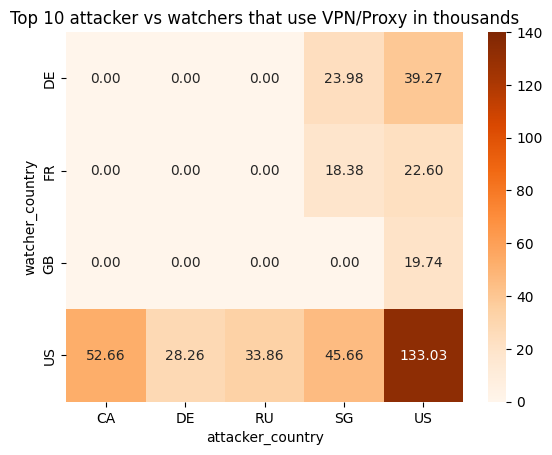

In [43]:
heatmap_data = train_data.groupby(["attacker_country", "watcher_country"]).agg({"label": "sum"}).nlargest(10, columns="label").reset_index()
heatmap_data.label = heatmap_data.loc[:, "label"].map(lambda row: row / 1000)
pivot_heatmap_data = heatmap_data.pivot_table(values="label", index="watcher_country", columns="attacker_country", fill_value=0)
sns.heatmap(data=pivot_heatmap_data, cmap="Oranges", annot=True, fmt='.2f', vmin=0, vmax=140)
plt.title("Top 10 attacker vs watchers that use VPN/Proxy in thousands")

# Plot obligatorios 4, 5 y 6
**Atencion**: el mes y el anio no seran utilizadas porque no tienen sentido (hay 2 meses y 1 anio)

In [3]:
print(train_data.loc[:, "attack_time"].dt.year.unique())
print(train_data.loc[:, "attack_time"].dt.month.unique())

[2023]
[7 8]


In [4]:
train_data2 = train_data.loc[:, ["attack_time", "label"]]
train_data2["attack_hour"] = train_data2.loc[:, "attack_time"].dt.hour
train_data2["attack_week_day"] = train_data2.loc[:, "attack_time"].dt.day_name()
train_data2["attack_month_day"] = train_data2.loc[:, "attack_time"].dt.day

In [5]:
data1= train_data2.groupby("attack_hour").agg({"label": "sum"})
data3 = train_data2.groupby("attack_week_day").agg({"label": "sum"})
data4 = train_data2.groupby("attack_month_day").agg({"label": "sum"})
del train_data2

In [6]:
data1.reset_index(inplace=True)
data3.reset_index(inplace=True)
data4.reset_index(inplace=True)

Text(0, 0.5, 'Amount of VPN/Proxy uses')

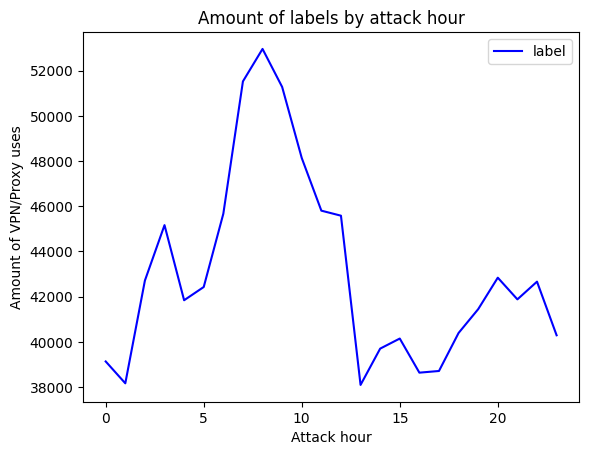

In [11]:
data1.plot(x='attack_hour', y='label', color="blue", kind='line'),
plt.title("Amount of labels by attack hour")
plt.xlabel("Attack hour")
plt.ylabel("Amount of VPN/Proxy uses")

Text(0, 0.5, 'Amount of VPN/Proxy uses')

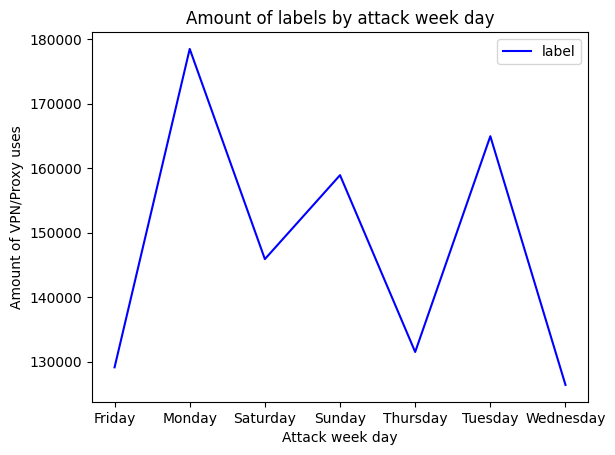

In [12]:
data3.plot(x='attack_week_day', y='label', color="blue", kind='line')
plt.title("Amount of labels by attack week day")
plt.xlabel("Attack week day")
plt.ylabel("Amount of VPN/Proxy uses")

Text(0, 0.5, 'Amount of VPN/Proxy uses')

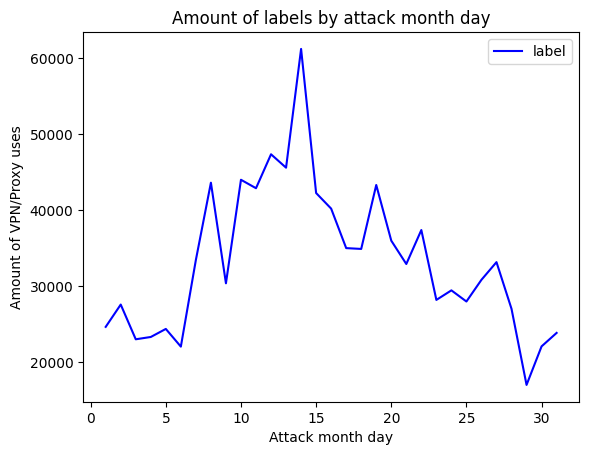

In [13]:
data4.plot(x='attack_month_day', y='label', color="blue", kind='line')
plt.title("Amount of labels by attack month day")
plt.xlabel("Attack month day")
plt.ylabel("Amount of VPN/Proxy uses")

# Algunos barplots extra

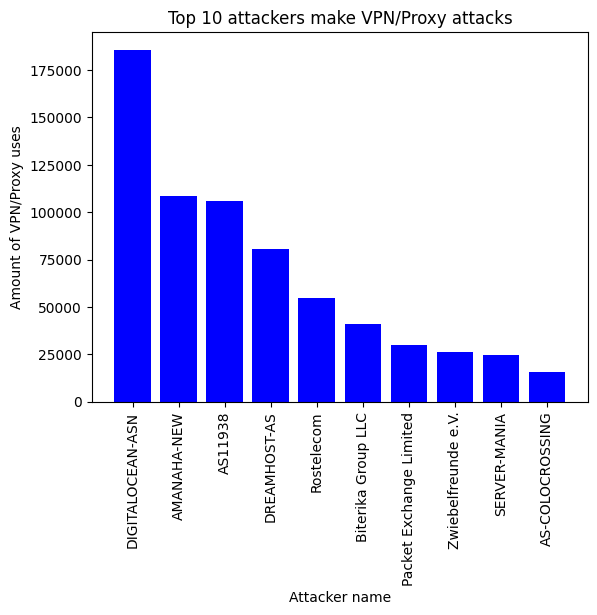

In [52]:
top_5_countries_vpn_proxy_attacks = train_data.groupby('attacker_as_name').agg({'label': 'sum'}).nlargest(10, columns='label').reset_index()
top_5_countries_vpn_proxy_attacks.columns = ["attacker_as_name", "vpn_proxy_amount_used_for_attacks"]
# top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks = top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks.map(lambda row: row/1000000) # divido entre 1 millon

plt.bar(x='attacker_as_name', height="vpn_proxy_amount_used_for_attacks", data=top_5_countries_vpn_proxy_attacks, color='blue')
plt.title("Top 10 attackers make VPN/Proxy attacks")
plt.xlabel("Attacker name")
plt.ylabel("Amount of VPN/Proxy uses")
plt.xticks(rotation=90)
plt.show()

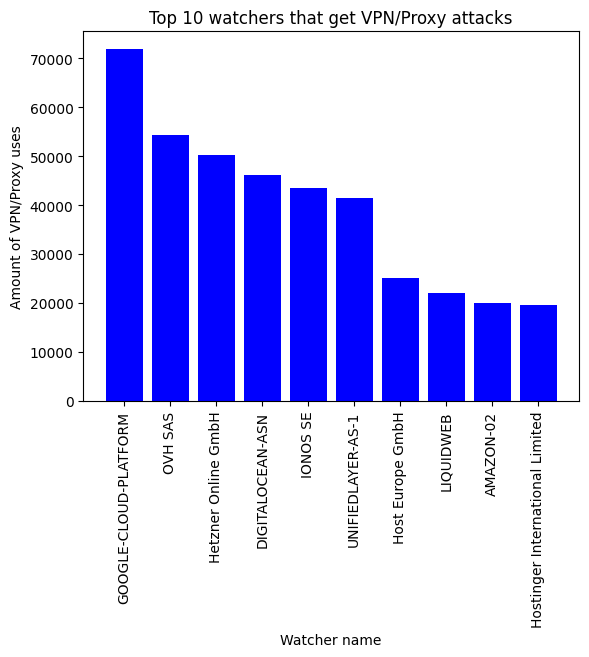

In [50]:
top_5_countries_vpn_proxy_attacks = train_data.groupby('watcher_as_name').agg({'label': 'sum'}).nlargest(10, columns='label').reset_index()
top_5_countries_vpn_proxy_attacks.columns = ["watcher_as_name", "vpn_proxy_amount_used_for_attacks"]
# top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks = top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks.map(lambda row: row/1000000) # divido entre 1 millon

plt.bar(x='watcher_as_name', height="vpn_proxy_amount_used_for_attacks", data=top_5_countries_vpn_proxy_attacks, color='blue')
plt.title("Top 10 watchers that get VPN/Proxy attacks")
plt.xlabel("Watcher name")
plt.ylabel("Amount of VPN/Proxy uses")
plt.xticks(rotation=90)
plt.show()

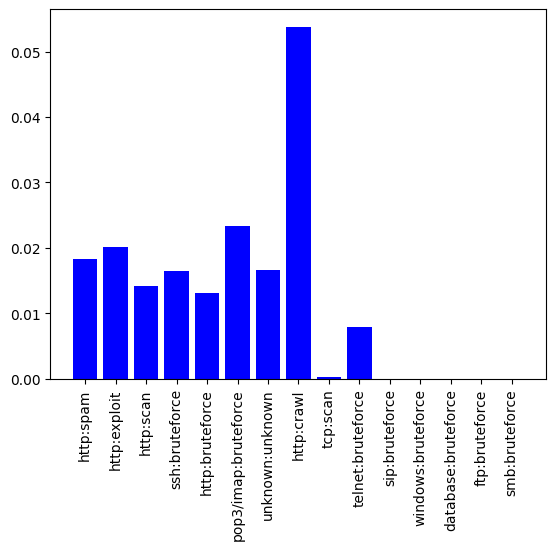

In [51]:
# top_5_countries_vpn_proxy_attacks = train_data.groupby('attack_type').agg({'label': 'sum', 'attack_type': 'count'}).nlargest(10, columns='label').reset_index()
# top_5_countries_vpn_proxy_attacks.columns = ["attack_type", "vpn_proxy_amount_used_for_attacks"]
# \
a = train_data.groupby('attack_type').agg({'label': 'sum', 'attack_type': 'count'}).sort_values(by="label", ascending=False)
b = a.label / a.attack_type
c = b.reset_index()
c.columns = ["attack_type", "label/ammount_of_attacks"]
plt.bar(x='attack_type', height="label/ammount_of_attacks", data=c, color='blue')
plt.xticks(rotation=90)
plt.show()
# plt.title("Top 10 watchers that get VPN/Proxy attacks")
# plt.xlabel("Countries")
# plt.ylabel("Amount of VPN/Proxy uses")

Text(0, 0.5, 'Amount of VPN/Proxy uses')

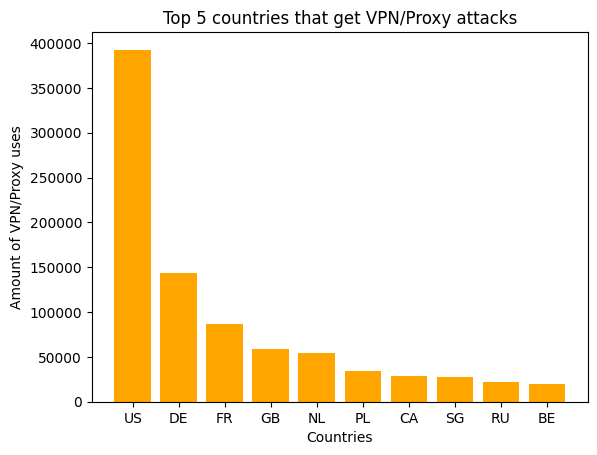

In [ ]:
top_5_countries_vpn_proxy_attacks = train_data.groupby('watcher_country').agg({'label': 'sum'}).nlargest(10, columns='label').reset_index()
top_5_countries_vpn_proxy_attacks.columns = ["watcher_country", "vpn_proxy_amount_used_for_attacks"]
# top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks = top_5_countries_vpn_proxy_attacks.vpn_proxy_amount_used_for_attacks.map(lambda row: row/1000000) # divido entre 1 millon

plt.bar(x='watcher_country', height="vpn_proxy_amount_used_for_attacks", data=top_5_countries_vpn_proxy_attacks, color='orange')
plt.title("Top 5 countries that get VPN/Proxy attacks")
plt.xlabel("Countries")
plt.ylabel("Amount of VPN/Proxy uses")

# Otro bar plot

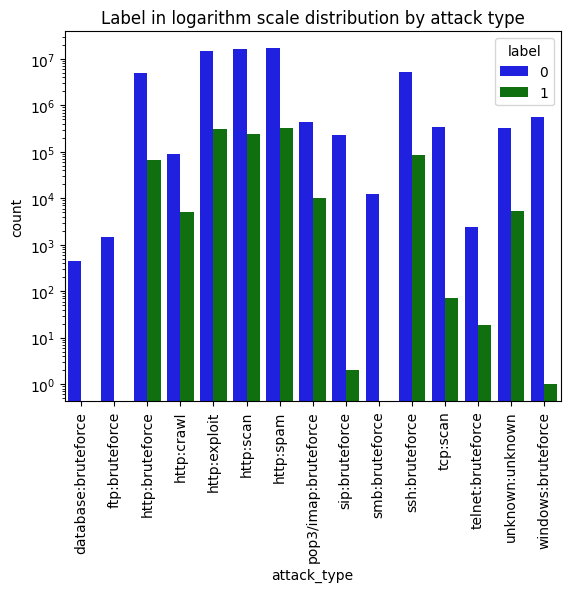

In [57]:
ax = sns.countplot(data=train_data, x='attack_type', hue='label', palette=["blue", "green"])
ax.set_yscale("log")  # Configura el eje Y en escala logarítmica
plt.title("Label in logarithm scale distribution by attack type")

plt.xticks(rotation=90)
plt.show()


# Estos plots son justificativos de algunas decisiones que se toman para agrupar posteriormente las categorias

En estos plots se ve que hay muchos nombres de atacantes que tienen una relacion del 100% respecto a entries/labels, y que utilizar solo la suma de estos no seria representativo

<Axes: xlabel='watcher_uuid_enum'>

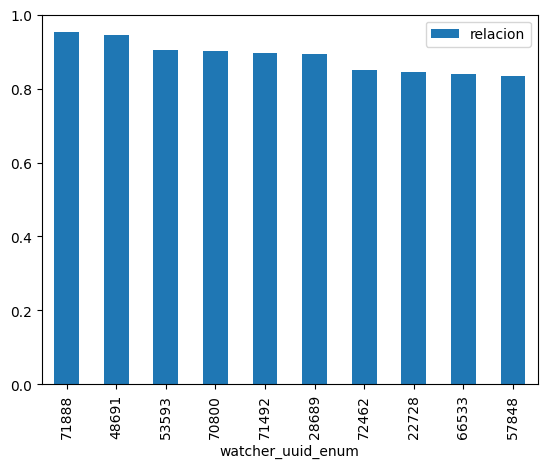

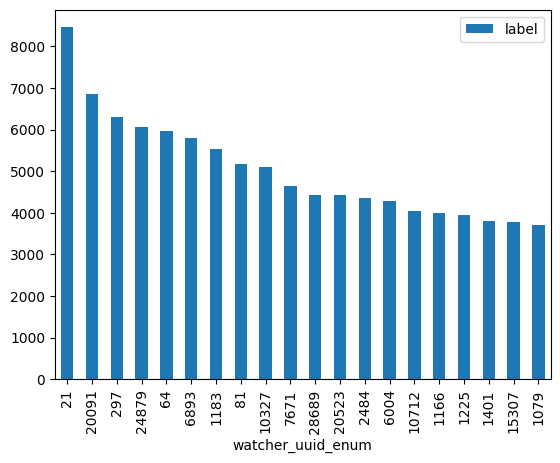

In [ ]:
attackers_with_most_labels = train_data.groupby("watcher_uuid_enum").agg({"label": "sum", "watcher_uuid_enum": "count"})
attackers_with_most_labels.columns = ["label", "watcher_uuid_enum_count"]
attackers_with_most_labels["relacion"] = (attackers_with_most_labels.label / attackers_with_most_labels.watcher_uuid_enum_count)
attackers_with_most_labels.reset_index(inplace=True)
b = attackers_with_most_labels.sort_values(by="relacion").loc[attackers_with_most_labels["relacion"] < 1.0, :].nlargest(10, columns="relacion")
a=attackers_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="watcher_uuid_enum", y="relacion")
a.plot.bar(x="watcher_uuid_enum", y="label")

<Axes: xlabel='attacker_as_name'>

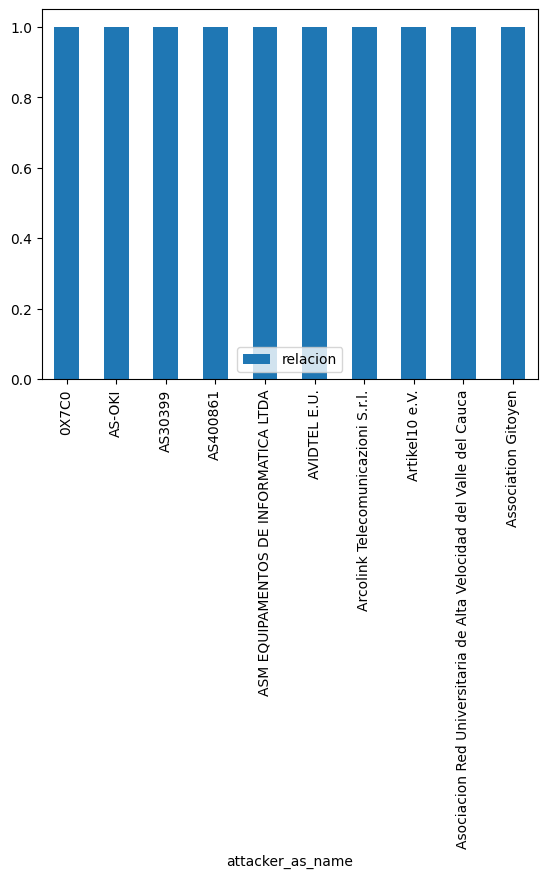

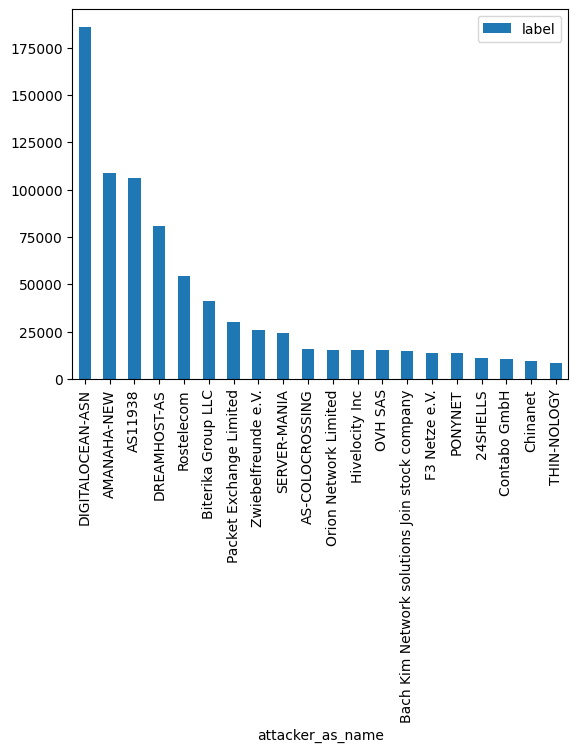

In [ ]:
attackers_with_most_labels = train_data.groupby("attacker_as_name").agg({"label": "sum", "attacker_as_name": "count"})
attackers_with_most_labels.columns = ["label", "attacker_as_name_count"]
attackers_with_most_labels["relacion"] = (attackers_with_most_labels.label / attackers_with_most_labels.attacker_as_name_count)
attackers_with_most_labels.reset_index(inplace=True)
b = attackers_with_most_labels.nlargest(10, columns="relacion")
a=attackers_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="attacker_as_name", y="relacion")
a.plot.bar(x="attacker_as_name", y="label")

En estos plots lo mismo, pero en este caso ya se ve una distribucion diferente en cuanto a relacion de entries/labels por "nombre de atacado"

<Axes: xlabel='watcher_as_name'>

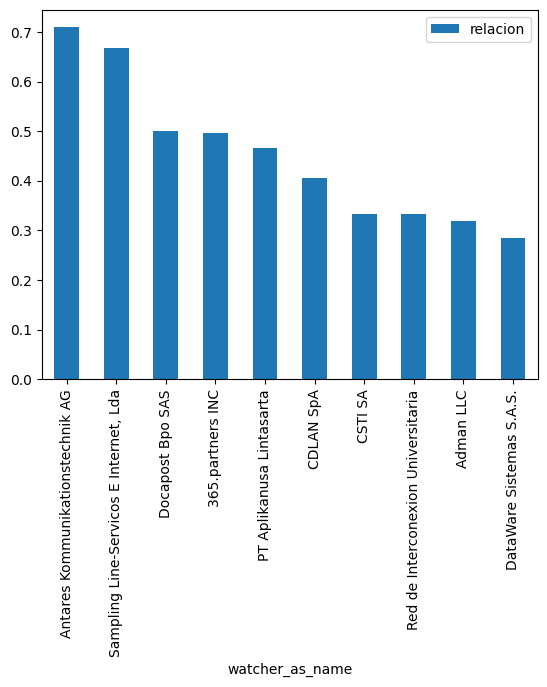

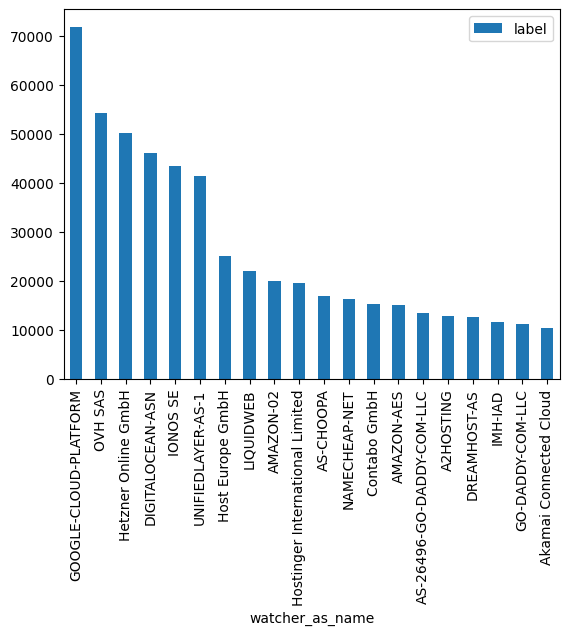

In [ ]:
watchers_with_most_labels = train_data.groupby("watcher_as_name").agg({"label": "sum", "watcher_as_name": "count"})
watchers_with_most_labels.columns = ["label", "watcher_as_name_count"]
watchers_with_most_labels["relacion"] = (watchers_with_most_labels.label / watchers_with_most_labels.watcher_as_name_count)
watchers_with_most_labels.reset_index(inplace=True)
b = watchers_with_most_labels.nlargest(10, columns="relacion")
a=watchers_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="watcher_as_name", y="relacion")
a.plot.bar(x="watcher_as_name", y="label")

<Axes: xlabel='watcher_country'>

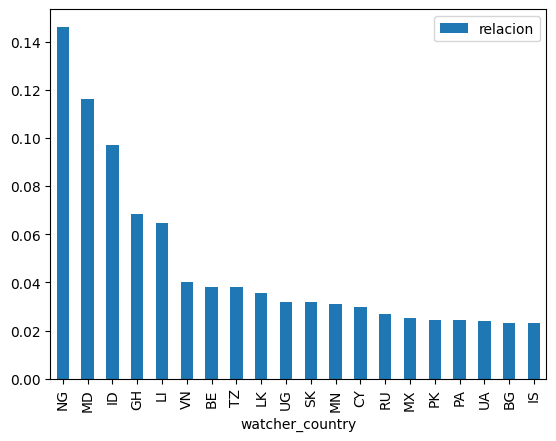

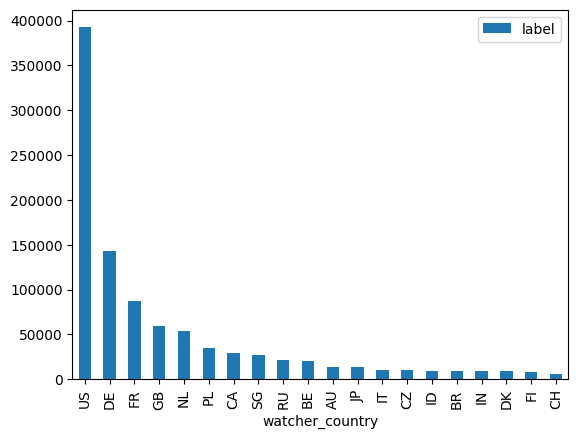

In [ ]:
watchers_countries_with_most_labels = train_data.groupby("watcher_country").agg({"label": "sum", "watcher_country": "count"})
watchers_countries_with_most_labels.columns = ["label", "watcher_country_count"]
watchers_countries_with_most_labels["relacion"] = (watchers_countries_with_most_labels.label / watchers_countries_with_most_labels.watcher_country_count)
watchers_countries_with_most_labels.reset_index(inplace=True)
b = watchers_countries_with_most_labels.nlargest(20, columns="relacion")
a=watchers_countries_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="watcher_country", y="relacion")
a.plot.bar(x="watcher_country", y="label")

<Axes: xlabel='attacker_country'>

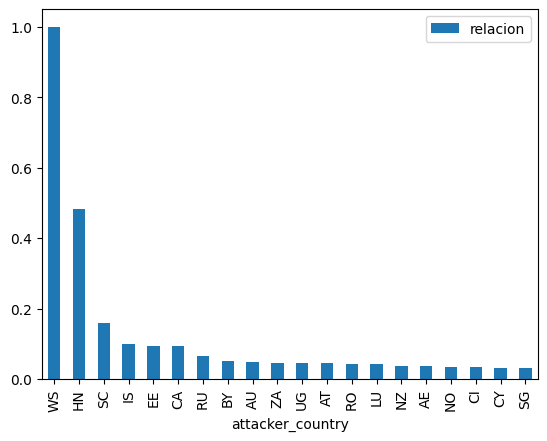

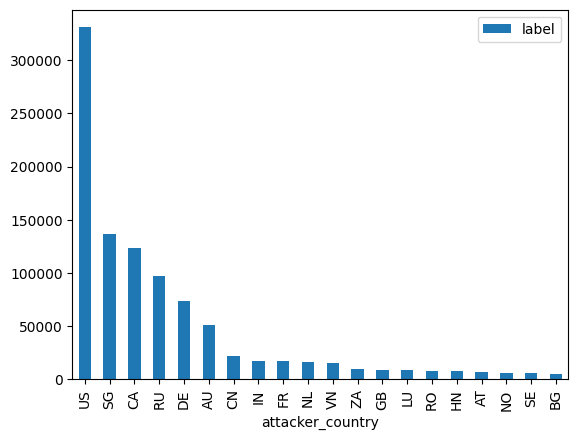

In [ ]:
attacker_countries_with_most_labels = train_data.groupby("attacker_country").agg({"label": "sum", "attacker_country": "count"})
attacker_countries_with_most_labels.columns = ["label", "attacker_country_count"]
attacker_countries_with_most_labels["relacion"] = (attacker_countries_with_most_labels.label / attacker_countries_with_most_labels.attacker_country_count)
attacker_countries_with_most_labels.reset_index(inplace=True)
b = attacker_countries_with_most_labels.nlargest(20, columns="relacion")
a=attacker_countries_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="attacker_country", y="relacion")
a.plot.bar(x="attacker_country", y="label")

In [ ]:
train_data["attack_protocol"] = train_data.attack_type.map(lambda row: row.split(':')[0]).astype("category")
train_data["attack_type"] = train_data.attack_type.map(lambda row: row.split(':')[1]).astype("category")

<Axes: xlabel='attack_protocol'>

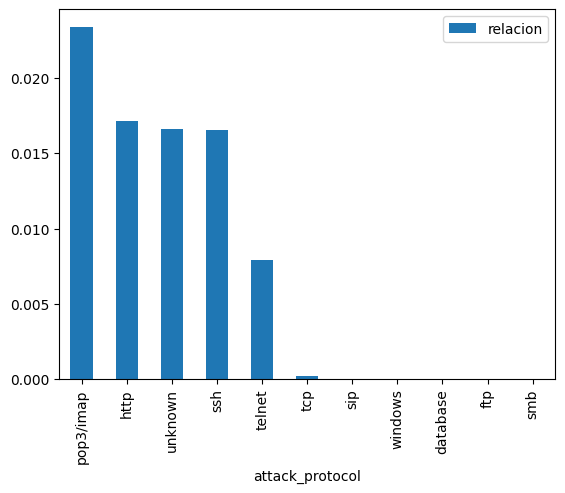

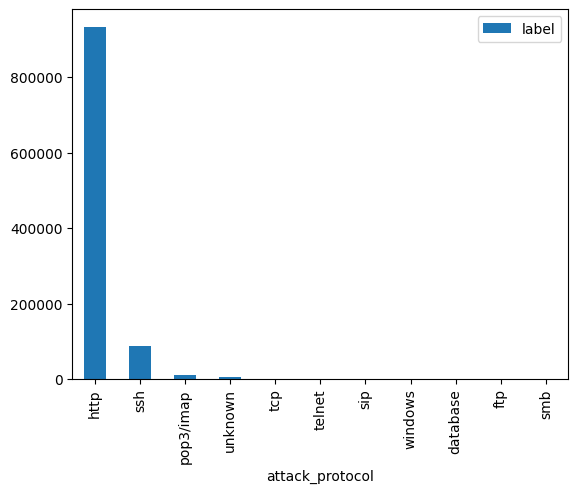

In [ ]:
protocols_with_most_labels = train_data.groupby("attack_protocol").agg({"label": "sum", "attack_protocol": "count"})
protocols_with_most_labels.columns = ["label", "attack_protocol_count"]
protocols_with_most_labels["relacion"] = (protocols_with_most_labels.label / protocols_with_most_labels.attack_protocol_count)
protocols_with_most_labels.reset_index(inplace=True)
b = protocols_with_most_labels.nlargest(20, columns="relacion")
a=protocols_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="attack_protocol", y="relacion")
a.plot.bar(x="attack_protocol", y="label")

<Axes: xlabel='attack_type'>

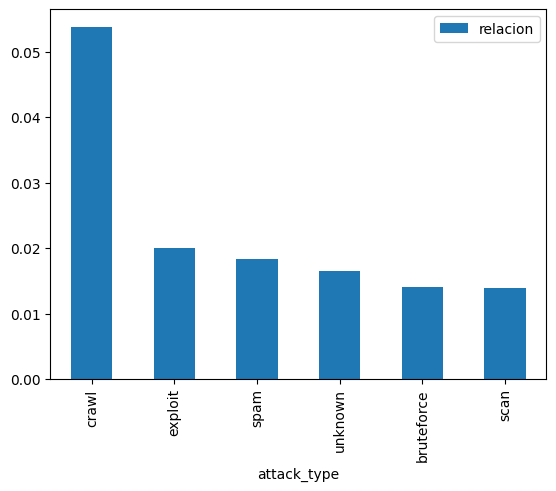

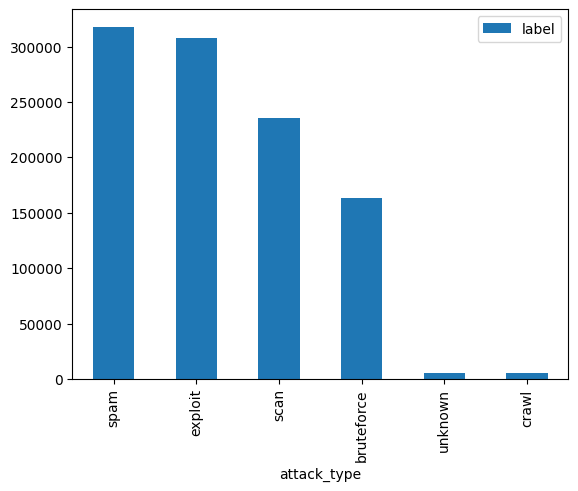

In [ ]:
attack_types_with_most_labels = train_data.groupby("attack_type").agg({"label": "sum", "attack_type": "count"})
attack_types_with_most_labels.columns = ["label", "attack_type_count"]
attack_types_with_most_labels["relacion"] = (attack_types_with_most_labels.label / attack_types_with_most_labels.attack_type_count)
attack_types_with_most_labels.reset_index(inplace=True)
b = attack_types_with_most_labels.nlargest(20, columns="relacion")
a=attack_types_with_most_labels.nlargest(20, columns='label')
b.plot.bar(x="attack_type", y="relacion")
a.plot.bar(x="attack_type", y="label")